
image 1/1 C:\Users\delbe\Documents\Coding Kuliah\Kuliah\CAWU 3\AI\Foodd\UPLOAD IMAGE\Test\bubur ayam.jpg: 384x640 3 Sate Padang_161 kkal per 100gs, 31.5ms
Speed: 21.2ms preprocess, 31.5ms inference, 47.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 C:\Users\delbe\Documents\Coding Kuliah\Kuliah\CAWU 3\AI\Foodd\UPLOAD IMAGE\Test\bubur ayam.jpg: 384x640 1 Chicken Teriyaki Bowl_211 kkal per 100g, 31.6ms
Speed: 4.9ms preprocess, 31.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 C:\Users\delbe\Documents\Coding Kuliah\Kuliah\CAWU 3\AI\Foodd\UPLOAD IMAGE\Test\bubur ayam.jpg: 384x640 2 Bubur Ayam_155 kkal per 100gs, 31.5ms
Speed: 3.0ms preprocess, 31.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 C:\Users\delbe\Documents\Coding Kuliah\Kuliah\CAWU 3\AI\Foodd\UPLOAD IMAGE\Test\bubur ayam.jpg: 384x640 1 Pho_90 kkal per 100g, 31.2ms
Speed: 3.2ms preprocess, 31.2ms inference, 1.0ms postprocess per image at shape (1, 3

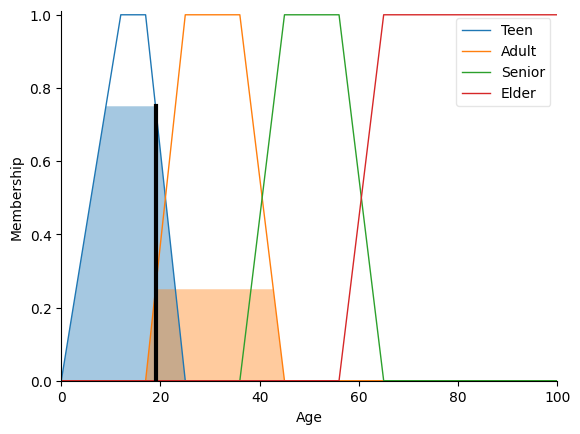

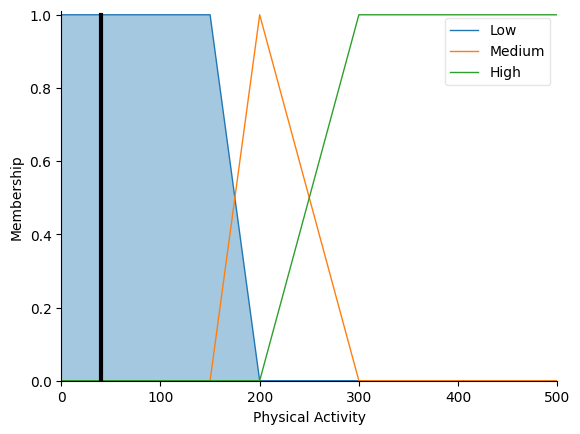

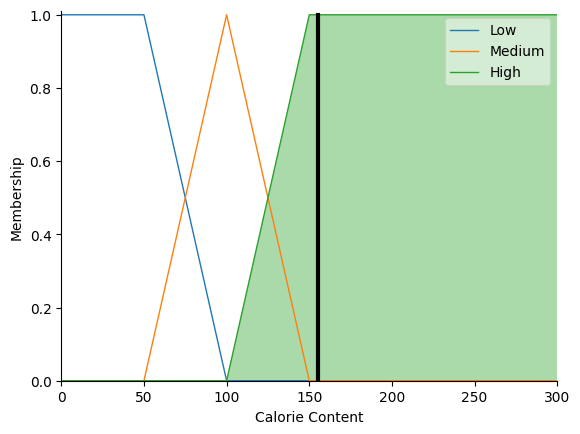

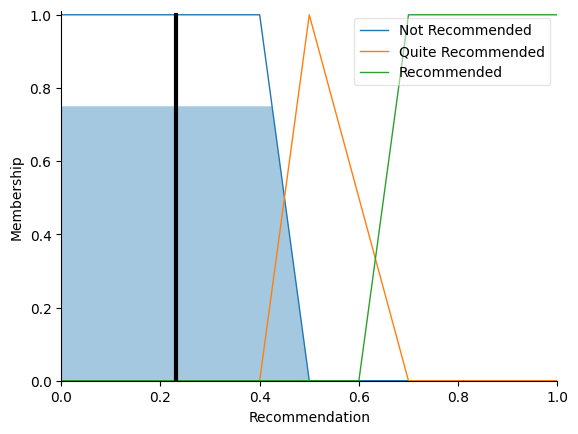


image 1/1 C:\Users\delbe\Documents\Coding Kuliah\Kuliah\CAWU 3\AI\Foodd\UPLOAD IMAGE\Test\sddefault.jpg: 480x640 2 Sate Padang_161 kkal per 100gs, 44.4ms
Speed: 5.5ms preprocess, 44.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 C:\Users\delbe\Documents\Coding Kuliah\Kuliah\CAWU 3\AI\Foodd\UPLOAD IMAGE\Test\sddefault.jpg: 480x640 1 Chicken Teriyaki Bowl_211 kkal per 100g, 42.6ms
Speed: 4.1ms preprocess, 42.6ms inference, 2.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 C:\Users\delbe\Documents\Coding Kuliah\Kuliah\CAWU 3\AI\Foodd\UPLOAD IMAGE\Test\sddefault.jpg: 480x640 2 Bubur Ayam_155 kkal per 100gs, 43.8ms
Speed: 4.5ms preprocess, 43.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 C:\Users\delbe\Documents\Coding Kuliah\Kuliah\CAWU 3\AI\Foodd\UPLOAD IMAGE\Test\sddefault.jpg: 480x640 (no detections), 42.8ms
Speed: 3.9ms preprocess, 42.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)



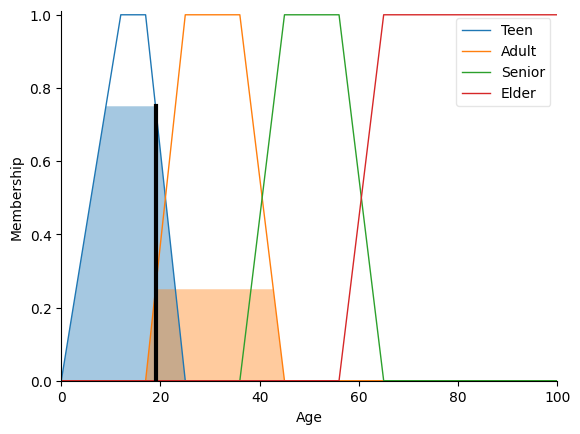

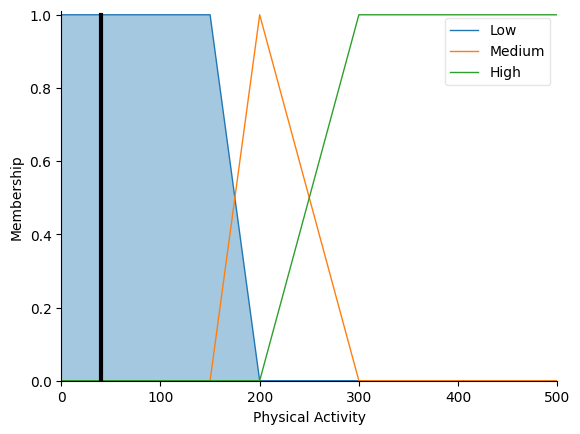

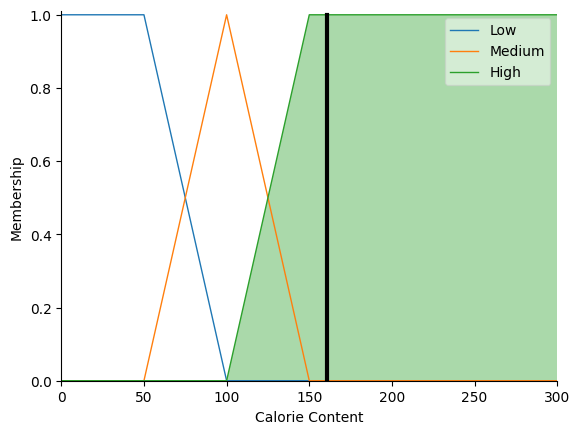

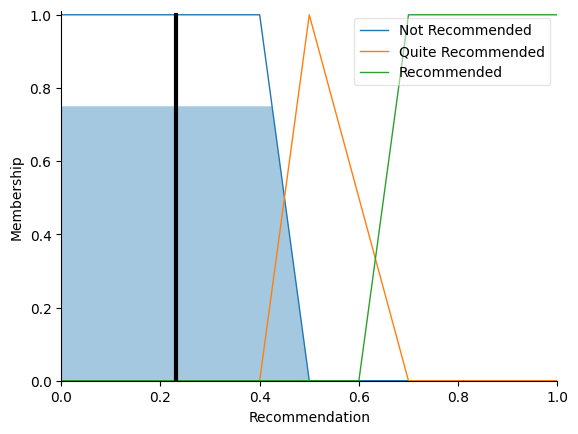

Proses deteksi selesai!
Total kalori dari semua makanan: 1205.60 kkal


In [11]:
import os
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import skfuzzy.control as ctrl

# Path untuk model yg akan di load
MODEL_PATHS = {
    
    "Sate Padang_161 kkal per 100g": r"C:\Users\delbe\Documents\Coding Kuliah\Kuliah\CAWU 3\AI\NyobaYolov8editlabel\runs\detect\train32 sate padang\weights\best.pt",
    "Chicken Teriyaki Bowl_211 kkal per 100g": r"C:\Users\delbe\Documents\Coding Kuliah\Kuliah\CAWU 3\AI\NyobaYolov8editlabel\runs\detect\train34 chicken teriyaki\weights\best.pt",
    "Bubur Ayam_155 kkal per 100g": r"C:\Users\delbe\Documents\Coding Kuliah\Kuliah\CAWU 3\AI\NyobaYolov8editlabel\runs\detect\train30 bubur ayam\weights\best.pt",
    "Pho_90 kkal per 100g": r"C:\Users\delbe\Documents\Coding Kuliah\Kuliah\CAWU 3\AI\NyobaYolov8editlabel\runs\detect\train37\weights\best.pt",
    "Roastery Chicken_250 kkal per 100g": r"C:\Users\delbe\Documents\Coding Kuliah\Kuliah\CAWU 3\AI\NyobaYolov8editlabel\runs\detect\train40\weights\best.pt",
    "Soto Betawi_175 kkal per 100g": r"C:\Users\delbe\Documents\Coding Kuliah\Kuliah\CAWU 3\AI\NyobaYolov8editlabel\runs\detect\train41\weights\best.pt",
    "Nasi Ayam Hainan_207 kkal per 100g": r"C:\Users\delbe\Documents\Coding Kuliah\Kuliah\CAWU 3\AI\NyobaYolov8editlabel\runs\detect\train28 nasi hainan\weights\best.pt",
    "Sop Buntut_135 kkal per 100g": r"C:\Users\delbe\Documents\Coding Kuliah\Kuliah\CAWU 3\AI\NyobaYolov8editlabel\runs\detect\train42\weights\best.pt",
    "Sop Iga_175 kkal per 100g": r"C:\Users\delbe\Documents\Coding Kuliah\Kuliah\CAWU 3\AI\NyobaYolov8editlabel\runs\detect\train45\weights\best.pt"
}


FOOD_LIST = ["Chicken Teriyaki Bowl_211 kkal per 100g", "Sate Padang_161 kkal per 100g", "Bubur Ayam_155 kkal per 100g","Pho_90 kkal per 100g","Roastery Chicken_250 kkal per 100g","Soto Betawi_175 kkal per 100g","Nasi Ayam Hainan_207 kkal per 100g","Sop Buntut_135 kkal per 100g","Sop Iga_175 kkal per 100g"]


food_weights = {} #untuk menyimpan makanan yang terdeketsi
total_calories = 0 #utk menyimpan total kalori

def detect_food_image(image_path, confidence_threshold=0.25):
    detected_food = None
    calorie_content = 0
    best_confidence = 0

    # print("Mulai proses")  # Debug

    for food_name, model_path in MODEL_PATHS.items():
        # print(f"Loading model for {food_name} from {model_path}")  # Debug
        model = YOLO(model_path)
        results = model(image_path)
        
        # print(f"Detection results for {food_name}: {results[0].boxes}")  # Debug

        if results and len(results[0].boxes) > 0:  
            for box in results[0].boxes:
                confidence = box.conf.item()  # utk ambil nilai confidence
                # print(f"Detected {food_name} with confidence {confidence}")  # Debug
                if confidence > best_confidence and confidence > confidence_threshold:
                    best_confidence = confidence
                    detected_food = food_name
                    calorie_content = float(detected_food.split("_")[1].split()[0])  # untuk mengambil nilai kalorie pada nama  makanan dgn mengsplit nama

    if detected_food:
        print(f"Deteksi terbaik: {detected_food} dengan confidence {best_confidence:.2f}")
    else:
        print("Tidak ada deteksi yang melebihi threshold confidence.")
    
    return detected_food, calorie_content

def process_images(image_folder, output_folder, age_input, physical_activity_input):
    global total_calories
    
    if not os.path.exists(image_folder):
        print("Folder gambar tidak ditemukan!")
        return

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    detected_foods = []  # List utk menyimpan makanan yang terdeteksi
    calorie_per_100g = []  # List utk menyimpan kalori per 100g

    for filename in os.listdir(image_folder):
        image_path = os.path.join(image_folder, filename)
        image = cv2.imread(image_path)

        if image is None:
            print(f"Image {image_path} tidak ditemukan.")
            continue

        detected_food, calorie_content = detect_food_image(image_path)

        if detected_food:
            cv2.putText(image, detected_food, (50, 50),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

            # Simpan data makanan dan kalori per 100g
            detected_foods.append(detected_food.split('_')[0])  # Ambil nama makanan tanpa kalori
            calorie_per_100g.append(calorie_content)  # Ambil kalori per 100 gram
            
            try:
                food_weight = float(input(f"Masukkan berat {detected_food} (dalam gram): "))
            except ValueError:
                print(f"Input berat tidak valid untuk {detected_food}, lewati.")
                continue

            calories = calorie_content * food_weight / 100
            total_calories += calories
            print(f"Kalori untuk {detected_food}: {calories:.2f} kkal")

            if detected_food in food_weights:
                food_weights[detected_food] += food_weight
            else:
                food_weights[detected_food] = food_weight

            print(f"Menjalankan fuzzy logic untuk {detected_food}")
            run_fuzzy_logic(age_input, physical_activity_input, calorie_content)  

        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, image)
    
    print("Proses deteksi selesai!")

# Fungsi untuk menjalankan fuzzy logic dan menyimpan hasil plotting
def run_fuzzy_logic(age_input, physical_activity_input, calorie_content_input):
    # Definisi variabel umur
    age = ctrl.Antecedent(np.arange(0, 101, 1), 'Age')
    # Definisi variabel aktivitas fisik
    physical_activity = ctrl.Antecedent(np.arange(0, 501, 1), 'Physical Activity')
    # Definisi variabel kalori makanan
    calorie_content = ctrl.Antecedent(np.arange(0, 301, 1), 'Calorie Content')
    # Definisi variabel rekomendasi
    recommendation = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'Recommendation')

    # Fuzzifikasi variabel umur
    age['Teen'] = fuzz.trapmf(age.universe, [0, 12, 17, 25])
    age['Adult'] = fuzz.trapmf(age.universe, [17, 25, 36, 45])
    age['Senior'] = fuzz.trapmf(age.universe, [36, 45, 56, 65])
    age['Elder'] = fuzz.trapmf(age.universe, [56, 65, 101, 101])

    # Fuzzifikasi variabel aktivitas fisik
    physical_activity['Low'] = fuzz.trapmf(physical_activity.universe, [0, 0, 150, 200])
    physical_activity['Medium'] = fuzz.trimf(physical_activity.universe, [150, 200, 300])
    physical_activity['High'] = fuzz.trapmf(physical_activity.universe, [200, 300, 501, 501])

    # Fuzzifikasi variabel kalori makanan
    calorie_content['Low'] = fuzz.trapmf(calorie_content.universe, [0, 0, 50, 100])
    calorie_content['Medium'] = fuzz.trimf(calorie_content.universe, [50, 100, 150])
    calorie_content['High'] = fuzz.trapmf(calorie_content.universe, [100, 150, 301, 301])

    # Fuzzifikasi variabel rekomendasi
    recommendation['Not Recommended'] = fuzz.trapmf(recommendation.universe, [0, 0, 0.4, 0.5])
    recommendation['Quite Recommended'] = fuzz.trimf(recommendation.universe, [0.4, 0.5, 0.7])
    recommendation['Recommended'] = fuzz.trapmf(recommendation.universe, [0.6, 0.7, 1, 1])

    # Menampilkan grafik
    # age.view()
    # physical_activity.view()
    # calorie_content.view()
    # recommendation.view()
    # plt.show()

    # Aturan fuzzy
    rules = []

    # Definisikan aturan untuk kategori 'Teen'
    for activity in ['Low', 'Medium', 'High']:
        for calorie in ['Low', 'Medium', 'High']:
            if activity == 'Low' and calorie == 'High':
                rules.append(ctrl.Rule(age['Teen'] & physical_activity[activity] & calorie_content[calorie], recommendation['Not Recommended']))
            elif activity == 'Medium' and calorie == 'Low':
                rules.append(ctrl.Rule(age['Teen'] & physical_activity[activity] & calorie_content[calorie], recommendation['Quite Recommended']))
            elif activity == 'High' and calorie == 'Low':
                rules.append(ctrl.Rule(age['Teen'] & physical_activity[activity] & calorie_content[calorie], recommendation['Not Recommended']))
            elif activity == 'High' and calorie == 'Medium':
                rules.append(ctrl.Rule(age['Teen'] & physical_activity[activity] & calorie_content[calorie], recommendation['Quite Recommended']))
            else:
                rules.append(ctrl.Rule(age['Teen'] & physical_activity[activity] & calorie_content[calorie], recommendation['Recommended']))

    # Definisikan aturan untuk kategori 'Adult'
    for activity in ['Low', 'Medium', 'High']:
        for calorie in ['Low', 'Medium', 'High']:
            if activity == 'Low' and calorie == 'High':
                rules.append(ctrl.Rule(age['Adult'] & physical_activity[activity] & calorie_content[calorie], recommendation['Not Recommended']))
            elif activity == 'Medium' and calorie == 'Low':
                rules.append(ctrl.Rule(age['Adult'] & physical_activity[activity] & calorie_content[calorie], recommendation['Quite Recommended']))
            elif activity == 'High' and calorie == 'Low':
                rules.append(ctrl.Rule(age['Adult'] & physical_activity[activity] & calorie_content[calorie], recommendation['Not Recommended']))
            elif activity == 'High' and calorie == 'Medium':
                rules.append(ctrl.Rule(age['Adult'] & physical_activity[activity] & calorie_content[calorie], recommendation['Quite Recommended']))
            else:
                rules.append(ctrl.Rule(age['Adult'] & physical_activity[activity] & calorie_content[calorie], recommendation['Recommended']))

    # Definisikan aturan untuk kategori 'Senior'
    for activity in ['Low', 'Medium', 'High']:
        for calorie in ['Low', 'Medium', 'High']:
            if activity == 'Low' and calorie == 'High':
                rules.append(ctrl.Rule(age['Senior'] & physical_activity[activity] & calorie_content[calorie], recommendation['Not Recommended']))
            elif activity == 'Medium' and calorie == 'Low':
                rules.append(ctrl.Rule(age['Senior'] & physical_activity[activity] & calorie_content[calorie], recommendation['Quite Recommended']))
            elif activity == 'High' and calorie == 'Low':
                rules.append(ctrl.Rule(age['Senior'] & physical_activity[activity] & calorie_content[calorie], recommendation['Not Recommended']))
            elif activity == 'High' and calorie == 'Medium':
                rules.append(ctrl.Rule(age['Senior'] & physical_activity[activity] & calorie_content[calorie], recommendation['Quite Recommended']))
            else:
                rules.append(ctrl.Rule(age['Senior'] & physical_activity[activity] & calorie_content[calorie], recommendation['Recommended']))

    # Definisikan aturan untuk kategori 'Elder'
    for activity in ['Low', 'Medium', 'High']:
        for calorie in ['Low', 'Medium', 'High']:
            if calorie == 'High':
                if activity == 'High':
                    rules.append(ctrl.Rule(age['Elder'] & physical_activity[activity] & calorie_content[calorie], recommendation['Recommended']))
                else:
                    rules.append(ctrl.Rule(age['Elder'] & physical_activity[activity] & calorie_content[calorie], recommendation['Not Recommended']))
            elif activity == 'Low' and calorie == 'Medium':
                rules.append(ctrl.Rule(age['Elder'] & physical_activity[activity] & calorie_content[calorie], recommendation['Quite Recommended']))
            elif activity == 'Medium' and calorie == 'Low':
                rules.append(ctrl.Rule(age['Elder'] & physical_activity[activity] & calorie_content[calorie], recommendation['Quite Recommended']))
            elif activity == 'High' and calorie == 'Low':
                rules.append(ctrl.Rule(age['Elder'] & physical_activity[activity] & calorie_content[calorie], recommendation['Not Recommended']))
            elif activity == 'High' and calorie == 'Medium':
                rules.append(ctrl.Rule(age['Elder'] & physical_activity[activity] & calorie_content[calorie], recommendation['Quite Recommended']))
            else:
                rules.append(ctrl.Rule(age['Elder'] & physical_activity[activity] & calorie_content[calorie], recommendation['Recommended']))


    # # Menerapkan sistem fuzzy
    # recommendation_ctrl = ctrl.ControlSystem(rules)
    # recommendation_simulation = ctrl.ControlSystemSimulation(recommendation_ctrl)

    # # Masukkan input untuk fuzzy logic
    # recommendation_simulation.input['Age'] = age_input
    # recommendation_simulation.input['Physical Activity'] = physical_activity_input
    # recommendation_simulation.input['Calorie Content'] = calorie_content_input
    # recommendation_simulation.compute()

    # # Tampilkan hasil
    # recommendation_result = recommendation_simulation.output['Recommendation']
    # print(f"Hasil rekomendasi: {recommendation_result}")
    # if recommendation_result >= 0.7:
    #     print("Makanan ini sangat direkomendasikan!")
    # elif 0.4 <= recommendation_result < 0.7:
    #     print("Makanan ini cukup direkomendasikan.")
    # else:
    #     print("Makanan ini tidak direkomendasikan.")
    # plt.show()

    # Sistem kontrol
    recommendation_ctrl = ctrl.ControlSystem(rules)
    recommendation_plant = ctrl.ControlSystemSimulation(recommendation_ctrl)

    # Input dari pengguna
    # age_input = float(input("Masukkan umur (tahun):\n"))
    # physical_activity_input = float(input("Masukkan aktivitas fisik (menit per minggu):\n"))
    # calorie_content_input = float(input("Masukkan kalori makanan per 100 gram:\n"))

    recommendation_plant.input['Age'] = age_input
    recommendation_plant.input['Physical Activity'] = physical_activity_input
    recommendation_plant.input['Calorie Content'] = calorie_content_input

    # Defuzzifikasi
    recommendation_plant.compute()

    # Cek hasil output
    output_value = recommendation_plant.output['Recommendation']
    print("Output value:", output_value)
    print("Rekomendasi makanan:", "Direkomendasikan" if output_value >= 0.7 else "Cukup Direkomendasikan" if output_value >= 0.4 else "Tidak Direkomendasikan")

    # Menampilkan hasil fuzzy logic
    age.view(sim=recommendation_plant)  # Menampilkan hasil simulasi untuk umur
    physical_activity.view(sim=recommendation_plant)  # Menampilkan hasil simulasi untuk aktivitas fisik
    calorie_content.view(sim=recommendation_plant)  # Menampilkan hasil simulasi untuk kalori makanan
    recommendation.view(sim=recommendation_plant)
    plt.show()
    
# Fungsi untuk memilih folder gambar
def select_image_folders():
    image_folder = input("Masukkan path folder gambar: ")
    output_folder = input("Masukkan path folder output: ")
    return image_folder, output_folder

# Fungsi untuk mendapatkan input umur dan aktivitas fisik
def get_user_inputs():
    age_input = int(input("Masukkan umur: "))
    physical_activity_input = int(input("Masukkan aktivitas fisik (dalam menit per minggu): "))
    return age_input, physical_activity_input

# Fungsi utama
def main():
    # Meminta input untuk gambar dn folder output
    image_folder, output_folder = select_image_folders()

    # Meminta input pengguna untuk umur dn aktivitas fisik
    age_input, physical_activity_input = get_user_inputs()

    # Memproses gambar dengan path input/output yg diberikan oleh pengguna
    process_images(image_folder, output_folder, age_input, physical_activity_input)
    print(f"Total kalori dari semua makanan: {total_calories:.2f} kkal")  # Cetak total kalori di akhir


if __name__ == "__main__":
    main()
